<a href="https://colab.research.google.com/github/B4rb4r1s/ML-NN/blob/main/HW_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Использовать датасет Fashion-MNIST для обучения (встроен в Keras). 
# Сделайте снимок какого-нибудь вашего элемента одежды и предскажите 
# его класс с помощью нейронной сети 
# (не забудьте убрать фон в редакторе или сфотографировать на светлом фоне!)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils, plot_model

from keras.datasets import fashion_mnist
from keras.layers.normalization import BatchNormalization
from keras.layers import MaxPool2D, InputLayer
from keras.initializers import Constant

import requests
from PIL import Image
from io import BytesIO

import random

%matplotlib inline

In [3]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
# print(f'X_train.shape: {X_train.shape}')
# print(f'y_train.shape: {Y_train.shape}')
# print(f'X_test.shape: {X_test.shape}')
# print(f'y_test.shape: {Y_test.shape}')

print('Train: X=%s, Y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, Y=%s' % (X_test.shape, Y_test.shape))

4423680/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), Y=(60000,)
Test: X=(10000, 28, 28), Y=(10000,)


In [4]:
SAMPLE_NUMBER = 0 # play around with this number - it should be between 0 and 50,000

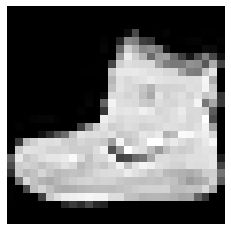

In [5]:
plt.figure(figsize=(4,4))
plt.imshow(X_train[SAMPLE_NUMBER], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

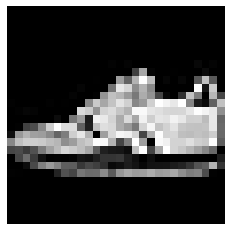

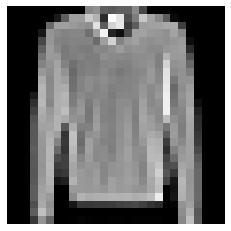

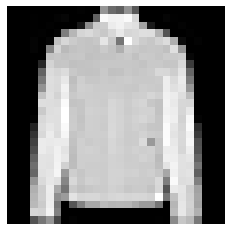

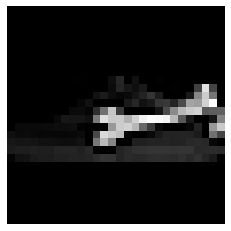

In [6]:
for i in range(4):
    plt.figure(figsize=(4,4))
    plt.imshow(X_train[random.randint(1,49999)], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

In [7]:
Fashion_mnist_classes = [
  'T-shirt',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'
]

def class_name(ix):
    return Fashion_mnist_classes[np.array(ix).flatten()[0]]

Image:


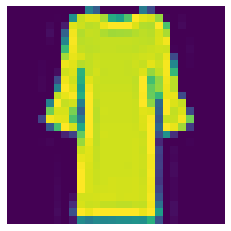

Its class name: Dress


In [8]:
print(f'Image:')
# plt.imshow(X_train[SAMPLE_NUMBER])
r = random.randint(1,49999)

plt.imshow(X_train[r])
plt.axis('off')
plt.show()
print(f'Its class name: {class_name(Y_train[r])}')

In [9]:
print(f'Above image is a numpy array:')
print(f'Its type is {type(X_train[r])}')
print(f'It has integer numbers from {X_train[r].min()} to {X_train[r].max()}')
print(f'And shape {X_train[r].shape} - {X_train[r].shape[0]}x{X_train[r].shape[0]} image with {X_train[r].shape[1]} base colors (RGB)')
print(f'Here\'s how Python sees it:')
print(X_train[r])

Above image is a numpy array:
Its type is <class 'numpy.ndarray'>
It has integer numbers from 0 to 255
And shape (28, 28) - 28x28 image with 28 base colors (RGB)
Here's how Python sees it:
[[  0   0   0   0   0   0   0   0   0   0 112  76   0   0   0   0   0 106
   57   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0 130 234 244 243 222 158 146 186 255 245
  240 216   3   0   3   0   0   0   0   0]
 [  0   0   0   0   0   5   0  19 243 236 229 231 248 255 255 255 242 226
  225 255 183   0   6   0   0   0   0   0]
 [  0   0   0   0   0   9   0  80 251 226 233 232 224 219 220 221 226 230
  228 240 223   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3   0 116 253 229 231 232 233 233 233 233 232 231
  230 241 251   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0 174 250 232 230 231 233 233 232 232 231 233
  235 237 236   2   0   4   0   0   0   0]
 [  0   0   0   0   0   0   0 220 247 241 232 235 234 234 234 234 235 237
  238 233 248  58   0   2   0   0  

In [10]:
X_train_ = X_train.astype('float32') / 255
X_train_ = X_train_.reshape(X_train_.shape[0], 1, 28, 28)
X_test_ = X_train.astype('float32') / 255
X_test_ = X_test_.reshape(X_test_.shape[0], 1, 28, 28)
Y_train_ = np_utils.to_categorical(Y_train, 10)
Y_test_ = np_utils.to_categorical(Y_train, 10)

In [11]:
print(Y_train_[0],'\n',X_train_.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
 (60000, 1, 28, 28)


In [12]:
model = Sequential()
model.add(InputLayer(input_shape=(1, 28, 28)))
model.add(BatchNormalization())
model.add(Conv2D(32,(2, 2), padding='same', bias_initializer=Constant(0.01), kernel_initializer='random_uniform'))
model.add(MaxPool2D(padding='same'))
model.add(Conv2D(32,(2, 2), padding='same',bias_initializer=Constant(0.01), kernel_initializer='random_uniform',input_shape=(1, 28, 28)))
model.add(MaxPool2D(padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu',bias_initializer=Constant(0.01), kernel_initializer='random_uniform',))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 1, 28, 28)         112       
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 28, 32)         3616      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 14, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 14, 32)         4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 224)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

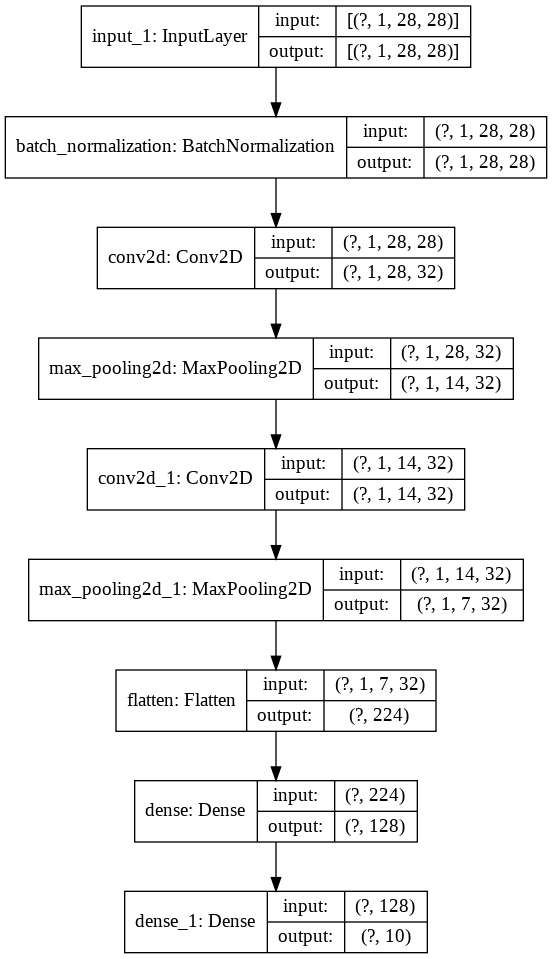

In [14]:
plot_model(model, show_shapes=True)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_, Y_train_, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 5s 14ms/step - loss: 0.6465 - accuracy: 0.7731 - val_loss: 0.5007 - val_accuracy: 0.8159
Epoch 2/20
375/375 [==============================] - 5s 13ms/step - loss: 0.4166 - accuracy: 0.8512 - val_loss: 0.3948 - val_accuracy: 0.8582
Epoch 3/20
375/375 [==============================] - 5s 12ms/step - loss: 0.3639 - accuracy: 0.8709 - val_loss: 0.3602 - val_accuracy: 0.8703
Epoch 4/20
375/375 [==============================] - 5s 12ms/step - loss: 0.3328 - accuracy: 0.8798 - val_loss: 0.3445 - val_accuracy: 0.8788
Epoch 5/20
375/375 [==============================] - 5s 12ms/step - loss: 0.3130 - accuracy: 0.8878 - val_loss: 0.3301 - val_accuracy: 0.8804
Epoch 6/20
375/375 [==============================] - 5s 12ms/step - loss: 0.2957 - accuracy: 0.8929 - val_loss: 0.3161 - val_accuracy: 0.8848
Epoch 7/20
375/375 [==============================] - 5s 12ms/step - loss: 0.2843 - accuracy: 0.8974 - val_loss: 0.3122 - val_accuracy: 0.8869

In [16]:
model.evaluate(X_test_, Y_test_)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1939 - accuracy: 0.9303


[0.19393706321716309, 0.9302999973297119]

In [17]:
def resize_image(url, size):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('L')
    width, height = img.size
    square_side = min(width, height)
    img = img.crop((
        np.ceil((width - square_side) / 2),
        np.ceil((height - square_side) / 2),
        np.ceil((width + square_side) / 2),
        np.ceil((height + square_side) / 2)
    ))

    img.thumbnail((size, size))
    np_array = np.array(img) / 255
    return np_array

In [18]:
lnk = 'https://raw.githubusercontent.com/B4rb4r1s/ML-NN/main/CNN_test.png'

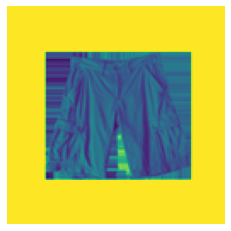

In [19]:
pic = resize_image(lnk, 28)
plt.axis('off')
plt.imshow(resize_image(lnk, 128));

In [20]:
# wtf?

Image:


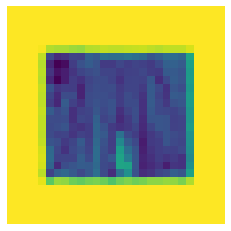

Its class name: Bag


In [21]:
cnn_test = pic.reshape(1, 28, 28)
print(f'Image:')
plt.imshow(pic)
plt.axis('off')
plt.show()
print(f'Its class name: {class_name(np.argmax(model.predict(np.array([cnn_test]))))}')

In [22]:
# ok...

Image:


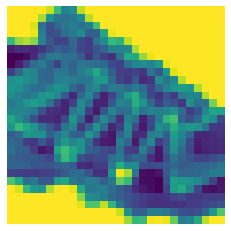

Its class name: T-shirt


In [23]:
lnk = 'https://pngimg.com/uploads/men_shoes/men_shoes_PNG7487.png'

pic = resize_image(lnk, 28)
plt.axis('off')
plt.imshow(resize_image(lnk, 128));

cnn_test = pic.reshape(1, 28, 28)
print(f'Image:')
plt.imshow(pic)
plt.axis('off')
plt.show()
print(f'Its class name: {class_name(np.argmax(model.predict(np.array([cnn_test]))))}')

Image:


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


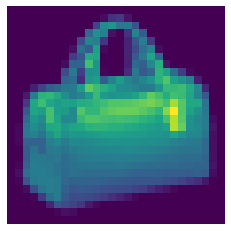

Its class name: Bag


In [24]:
lnk = 'https://assets.stickpng.com/images/580b57fbd9996e24bc43bf85.png'

pic = resize_image(lnk, 28)
plt.axis('off')
plt.imshow(resize_image(lnk, 128));

cnn_test = pic.reshape(1, 28, 28)
print(f'Image:')
plt.imshow(pic)
plt.axis('off')
plt.show()
print(f'Its class name: {class_name(np.argmax(model.predict(np.array([cnn_test]))))}')

Image:


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


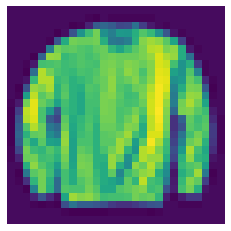

Its class name: Bag


In [25]:
lnk = 'https://pngimg.com/uploads/sweater/sweater_PNG50.png'

pic = resize_image(lnk, 28)
plt.axis('off')
plt.imshow(resize_image(lnk, 128));

cnn_test = pic.reshape(1, 28, 28)
print(f'Image:')
plt.imshow(pic)
plt.axis('off')
plt.show()
print(f'Its class name: {class_name(np.argmax(model.predict(np.array([cnn_test]))))}')